# The Biggest Ideas in the Universe: space, time, and motion by Sean Carroll

I recently read this book, which I really liked. I felt pretty good about my ability to follow the math in the first half of the book or so, but had a hard time following all of the notation as the book progressed. The concepts seemed to make sense, but the syntax was unfamiliar. So, I thought I'd try to follow through the equations in the book in a way that feels more familiar to me. Maybe writing it out will help me understand it better.

## Chapter 1: Conservation

### Page 13

Plotting 2D vectors using matplotlib is much less straightforward than I expected

references:
    https://danielmuellerkomorowska.com/2020/06/19/plotting-2d-vectors-with-matplotlib/
    https://www.geeksforgeeks.org/how-to-plot-a-simple-vector-field-in-matplotlib/
    https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib
    https://pythonforundergradengineers.com/quiver-plot-with-matplotlib-and-jupyter-notebooks.html
    https://stackoverflow.com/questions/44409084/how-to-zip-two-1d-numpy-array-to-2d-numpy-array

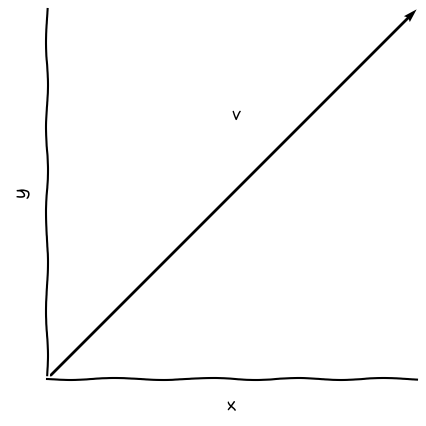

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Set xkcd style
plt.xkcd()

fig, ax = plt.subplots()

#start at 0,0, go to 1,1
plt.quiver(0,0,1,1, scale=1)

#label the vector
ax.text(.5,.7,'v')

#setup how the graph should look
ax.axis([0,1,0,1])
ax.set_aspect('equal')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('x')
ax.set_ylabel('y')

#show the graph
plt.show()

### Page 14

<class 'numpy.ndarray'>
[[ 0  0  1  3]
 [ 1  3  2 -1]
 [ 0  0  3  2]]
<class 'numpy.ndarray'>
[ True  True  True  True]


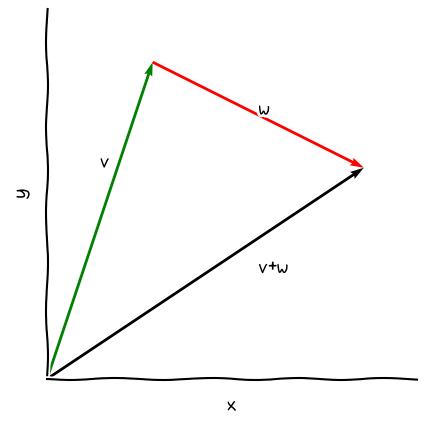

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Set xkcd style
plt.xkcd()

vector_v = np.array([0,0,1,3])
vector_w = np.array([1,3,2,-1])
vectors = np.array([vector_v, vector_w])

#this feels gross, but if we just normally sum the two vectors, i.e. 
#vector_vw = vector_v + vector_w
#vector_vw will start at 1,3 like w does, which is not the picture we're trying to make
vector_vw = np.array([0,0,vector_v[2] + vector_w[2],vector_v[3] + vector_w[3]])

vectors = np.append(vectors, vector_vw[None,:], axis=0)
print(type(vector_vw))
print(vectors)
print(type(vectors))
print(np.isfinite(vector_v))

fig, ax = plt.subplots(1)
ax.quiver( vectors[:,0],
           vectors[:,1],
           vectors[:,2],
           vectors[:,3],
           scale=1,
           scale_units='xy',
           angles = 'xy',
           color=['g', 'r', 'k'])

ax.text(.5,2,'v')
ax.text(2,2.5,'w')
ax.text(2,1,'v+w')

ax.set_xlim((-1, vectors[:,0].max()+1))
ax.set_ylim((-1, vectors[:,1].max()+1))
ax.axis([0,3.5,0,3.5])
ax.set_aspect('equal')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## Using Sympy

This is overly complicated for no particularly good reason, other than trying to learn how to use sympy to do the same thing I did above with regular numpy arrays.

[[ 0  0  1  3]
 [ 1  3  2 -1]
 [ 0  0  3  2]]


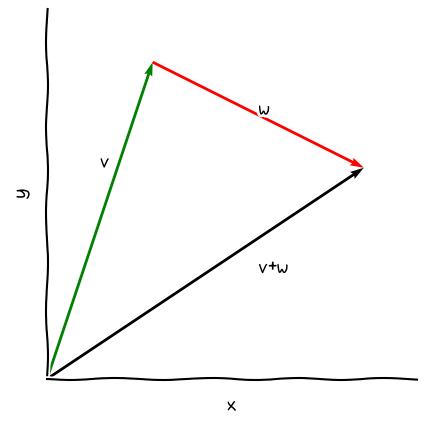

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.physics.vector import *
from sympy.matrices import *

# Set xkcd style
plt.xkcd()

N = ReferenceFrame('N')

vector_v = 1*N.x + 3*N.y
vector_w = 2*N.x - 1*N.y

vector_v_matrix = matrix2numpy(vector_v.to_matrix(N)).flatten()
vector_w_matrix = matrix2numpy(vector_w.to_matrix(N)).flatten()

vector_vw = vector_v + vector_w
vector_vw_matrix = matrix2numpy(vector_vw.to_matrix(N)).flatten()

vector_v_matrix_4 = np.array([0,0,vector_v_matrix[0],vector_v_matrix[1]])
vector_w_matrix_4 = np.array([vector_v_matrix[0],vector_v_matrix[1],vector_w_matrix[0],vector_w_matrix[1]])
vector_vw_matrix_4 = np.array([0,0,vector_vw_matrix[0], vector_vw_matrix[1]])

#array elements are sympy datatypes - need regular python numbers for quiver
vectors = np.array([vector_v_matrix_4.astype(int), vector_w_matrix_4.astype(int), vector_vw_matrix_4.astype(int)])
print(vectors)

fig, ax = plt.subplots(1)
ax.quiver( vectors[:,0],
           vectors[:,1],
           vectors[:,2],
           vectors[:,3],
           scale=1,
           scale_units='xy',
           angles = 'xy',
           color=['g', 'r', 'k'])

ax.text(.5,2,'v')
ax.text(2,2.5,'w')
ax.text(2,1,'v+w')

ax.set_xlim((-1, vectors[:,0].max()+1))
ax.set_ylim((-1, vectors[:,1].max()+1))
ax.axis([0,3.5,0,3.5])
ax.set_aspect('equal')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## ChatGPT version

I asked ChatGPT to make the same graph to see what method it used. 

This version defines the vector using an angle in radians rather than setting the ending coordinates explicitly like I did, but vector addition and plotting all work pretty much the same way.

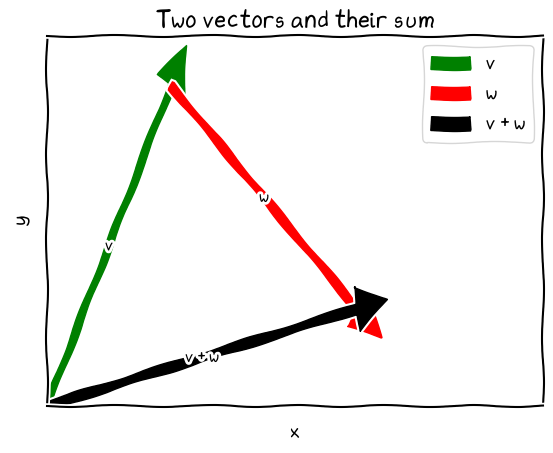

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Set xkcd style
plt.xkcd()

# Create figure and axis
fig, ax = plt.subplots()

# Define vector magnitude and angle
v_mag = 4
v_angle = np.pi/3  # 60 degrees in radians

# Calculate vector components
v_x = v_mag * np.cos(v_angle)
v_y = v_mag * np.sin(v_angle)

# Plot vector v
ax.arrow(0, 0, v_x, v_y, width=0.1, head_width=0.5, head_length=0.5, color='green', label='v')

# Define vector w magnitude and angle relative to v
w_mag = 2.5
w_angle = np.pi/4  # 45 degrees in radians

# Calculate vector w components relative to v
w_x = (5 - v_x)
w_y = -w_mag * np.sin(w_angle + v_angle)

# Plot vector w
ax.arrow(v_x, v_y, w_x, w_y, width=0.1, head_width=0.5, head_length=0.5, color='red', label='w')

# Calculate vector vw components
vw_x = v_x + w_x
vw_y = v_y + w_y

# Plot vector v+w
ax.arrow(0, 0, vw_x, vw_y, width=0.1, head_width=0.5, head_length=0.5, color='black', label='v + w')

# Add labels to vectors
ax.text(v_x/2, v_y/2, 'v', fontsize=12, ha='center', va='center')
ax.text(v_x + w_x/2, v_y + w_y/2, 'w', fontsize=12, ha='center', va='center')
ax.text(vw_x/2, vw_y/2, 'v + w', fontsize=12, ha='center', va='center')

# Set x and y limits
ax.set_xlim([0, 8])
ax.set_ylim([0, 4])

# Remove ticks and labels on both axes
ax.set_xticks([])
ax.set_yticks([])

# Add labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Two vectors and their sum')

# Add legend
ax.legend()

# Show plot
plt.show()


## Page 14 (1.1)

In [14]:
from sympy.physics.vector import *

N = ReferenceFrame('N')
#arbitrarily deciding my velocity is represented by the basis vector x
velocity = N.x
mass=1
momentum = mass * velocity
print(momentum)
print(momentum.magnitude())

N.x
1


Increasing the mass means more momentum in the direction of our velocity vector

In [13]:
mass=3
momentum = mass * velocity
print(momentum)
print(momentum.magnitude())

3*N.x
3


## Page 16 (1.2)